In [1]:
# calling database form csv

import pandas as pd
import sys, os
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))


db = pd.read_csv('../../data/database/database.csv')
db.head()

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,11:32:06,04/04/2024,36.3,36.7,36.1,36.0,35.9,33.5,33.2,33.3,...,0.42,309.35,305.77,273.47,274.57,340.31,0.09,-2246.07,-2220.11,-25.96
1,11:32:08,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.3,...,0.42,309.57,305.77,273.48,274.57,340.31,0.09,-2247.67,-2220.11,-27.55
2,11:32:09,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
3,11:32:10,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
4,11:32:12,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74


In [2]:
db.columns

Index(['TIME', 'DATE', 'TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5', 'TC_6', 'TC_7',
       'TC_8', 'TC_9', 'PRESSURE', 'HEATER', 'HEATER SET POINT', 'date',
       'voltage', 'current', 'power', 'WF', 'FR[%]', 'Q[W]', 'alpha', 'beta',
       'pulse', 'Te_mean[C]', 'Tc_mean[C]', 'Te_std[C]', 'Tc_std[C]', 'P[bar]',
       'Te_mean[K]', 'Tc_mean[K]', 'Te_std[K]', 'Tc_std[K]', 'T_pulse[K]',
       'TR[K/W]', 'GFE_Te[KJ/mol]', 'GFE_Tc[KJ/mol]', 'dG[KJ/mol]'],
      dtype='object')

In [3]:
df_FR60_Q100 = db[(db['FR[%]'] == 60) & (db['Q[W]'] == 120)]
df_FR60_Q100

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
8490,16:32:36,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.6,...,0.58,311.85,304.17,273.82,274.58,0.00,0.06,-1432.44,-1397.18,-35.25
8491,16:32:37,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.7,...,0.58,311.85,304.20,273.82,274.59,0.00,0.06,-1432.44,-1397.30,-35.14
8492,16:32:39,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.7,...,0.58,311.85,304.20,273.82,274.59,0.00,0.06,-1432.44,-1397.30,-35.14
8493,16:32:40,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.7,...,0.58,311.85,304.20,273.82,274.59,0.00,0.06,-1432.44,-1397.30,-35.14
8494,16:32:44,04/04/2024,39.8,40.1,39.3,39.1,38.4,32.0,31.6,31.7,...,0.58,312.49,304.20,273.81,274.59,0.00,0.07,-1435.38,-1397.30,-38.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26198,11:44:54,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.6,...,2.57,377.09,359.98,274.24,293.05,347.23,0.14,2922.43,2789.79,132.64
26199,11:44:57,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.1,...,2.56,377.09,359.80,274.24,293.19,347.23,0.14,2910.22,2776.78,133.44
26200,11:44:58,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.1,...,2.56,377.09,359.80,274.24,293.19,347.23,0.14,2910.22,2776.78,133.44
26201,11:44:59,16/04/2024,103.3,103.1,103.4,105.0,105.0,81.7,96.3,61.1,...,2.56,377.11,359.80,274.11,293.19,347.23,0.14,2910.37,2776.78,133.59


In [4]:

# from zenml.client import Client

# artifact = Client().get_artifact_version('909b4d1a-4555-4310-92f4-3a213e7573b9')
# df = artifact.load()

In [5]:
df = db.copy()

FR 60
Q 40
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 60
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 80
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 100
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 120
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
FR 40
Q 40
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 60
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 80
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 100
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 120
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0


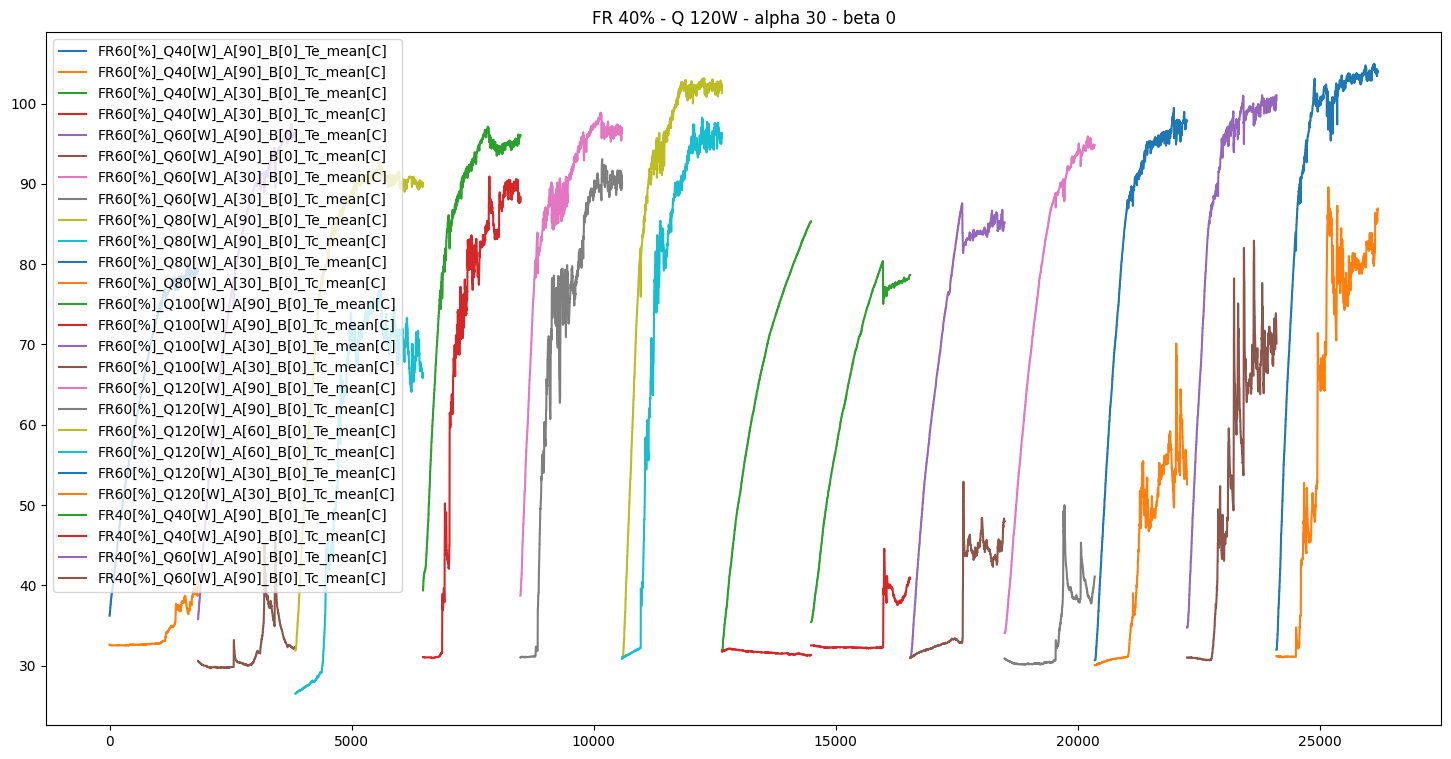

In [6]:
frs = df['FR[%]'].unique()
qs = df['Q[W]'].unique()
alphas = df['alpha'].unique()
betas = df['beta'].unique()
betas

import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                # df_.reset_index(inplace=True)
                
                if not df_.empty:
                    # Plotting
                    # plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
# change intend and it will change different overlapping of the graphs
plt.legend()
plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
plt.show()


In [7]:
df

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,11:32:06,04/04/2024,36.3,36.7,36.1,36.0,35.9,33.5,33.2,33.3,...,0.42,309.35,305.77,273.47,274.57,340.31,0.09,-2246.07,-2220.11,-25.96
1,11:32:08,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.3,...,0.42,309.57,305.77,273.48,274.57,340.31,0.09,-2247.67,-2220.11,-27.55
2,11:32:09,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
3,11:32:10,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
4,11:32:12,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26198,11:44:54,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.6,...,2.57,377.09,359.98,274.24,293.05,347.23,0.14,2922.43,2789.79,132.64
26199,11:44:57,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.1,...,2.56,377.09,359.80,274.24,293.19,347.23,0.14,2910.22,2776.78,133.44
26200,11:44:58,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.1,...,2.56,377.09,359.80,274.24,293.19,347.23,0.14,2910.22,2776.78,133.44
26201,11:44:59,16/04/2024,103.3,103.1,103.4,105.0,105.0,81.7,96.3,61.1,...,2.56,377.11,359.80,274.11,293.19,347.23,0.14,2910.37,2776.78,133.59


In [8]:
df.select_dtypes(include='object').columns.to_list()

['TIME', 'DATE', 'date', 'WF', 'pulse']

In [9]:
# Ensure Te_mean[C] and Tc_mean[C] are numeric
df['Te_mean[C]'] = pd.to_numeric(df['Te_mean[C]'], errors='coerce')
df['Tc_mean[C]'] = pd.to_numeric(df['Tc_mean[C]'], errors='coerce')

# Identify the object column automatically
object_column = df.select_dtypes(include='object').columns

# df_n = df.drop(columns=df.select_dtypes(include='object').columns, inplace=True)


# # Group by 'Te_mean[C]' and calculate the mean of numeric columns
df_numeric_mean = df.drop(columns=object_column)\
                    .groupby('Te_mean[C]')\
                    .agg('mean')

# # Extract the first value of the identified object column for each group
df_object = df.groupby('Te_mean[C]')[object_column].first()

# # Combine the mean numeric columns with the object column
df_mean = pd.concat([df_numeric_mean, df_object], axis=1).reset_index()
# df.drop(columns=df.select_dtypes(include='object').columns, inplace=True)
# # df.reset_index(inplace=True)
# df_mean = df.sort_values('Te_mean[C]').groupby(['Te_mean[C]'], as_index=False).mean()

df_mean

,Te_mean[C],TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,...,T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol],TIME,DATE,date,WF,pulse
0,30.66,30.500000,31.0,30.5,30.500000,30.8,30.700000,30.40,30.400000,28.700000,...,347.37,0.010000,-1897.497500,-1893.682500,-3.807500,10:55:37,15/04/2024,2024-04-15 10:55:37,DI water,11:11:30
1,30.68,30.500000,31.0,30.5,30.500000,30.9,30.655556,30.40,30.400000,28.700000,...,347.37,0.010000,-1675.772222,-1672.233333,-3.533333,10:55:44,15/04/2024,2024-04-15 10:55:44,DI water,11:11:30
2,30.80,30.700000,31.2,30.7,30.500000,30.9,30.600000,30.40,30.400000,28.700000,...,347.37,0.010000,-1622.740000,-1618.600000,-4.140000,10:56:00,15/04/2024,2024-04-15 10:56:00,DI water,11:11:30
3,30.84,30.700000,31.2,30.7,30.700000,30.9,30.600000,30.40,30.500000,28.700000,...,347.37,0.010000,-1440.060000,-1436.320000,-3.740000,10:56:05,15/04/2024,2024-04-15 10:56:05,DI water,11:11:30
4,30.98,30.900000,31.2,30.9,30.800000,31.1,31.400000,31.30,31.300000,29.700000,...,0.00,0.000000,-2268.660000,-2268.250000,-0.410000,10:25:36,04/08/2024,2024-08-04 10:25:36,DI water,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,104.80,105.433333,103.4,103.7,105.566667,105.9,62.400000,95.80,57.933333,106.866667,...,347.23,0.196667,2973.553333,2784.330000,189.223333,11:42:50,16/04/2024,2024-04-16 11:42:50,DI water,10:55:00
3076,104.86,104.400000,103.8,104.1,106.000000,106.0,61.200000,91.05,60.025000,108.350000,...,347.23,0.207500,3025.780000,2828.042500,197.740000,11:42:33,16/04/2024,2024-04-16 11:42:33,DI water,10:55:00
3077,104.88,106.000000,103.3,103.6,105.700000,105.8,60.500000,92.00,59.300000,107.300000,...,347.23,0.210000,2990.200000,2791.620000,198.580000,11:42:47,16/04/2024,2024-04-16 11:42:47,DI water,10:55:00
3078,104.94,106.600000,103.4,103.6,105.500000,105.6,60.700000,95.60,58.400000,106.900000,...,347.23,0.200000,2978.670000,2785.340000,193.330000,11:42:52,16/04/2024,2024-04-16 11:42:52,DI water,10:55:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26203 entries, 0 to 26202
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIME              26203 non-null  object 
 1   DATE              26203 non-null  object 
 2   TC_1              26203 non-null  float64
 3   TC_2              26203 non-null  float64
 4   TC_3              26203 non-null  float64
 5   TC_4              26203 non-null  float64
 6   TC_5              26203 non-null  float64
 7   TC_6              26203 non-null  float64
 8   TC_7              26203 non-null  float64
 9   TC_8              26203 non-null  float64
 10  TC_9              26203 non-null  float64
 11  PRESSURE          26203 non-null  float64
 12  HEATER            26203 non-null  int64  
 13  HEATER SET POINT  26203 non-null  int64  
 14  date              26203 non-null  object 
 15  voltage           26203 non-null  float64
 16  current           26203 non-null  float6

In [11]:
# df_mean = df.sort_values('Te_mean[C]').groupby(['Te_mean[C]'], as_index=False).mean()
# df_mean

FR 60
Q 40
alpha 90, beta 0


<Figure size 1800x900 with 0 Axes>

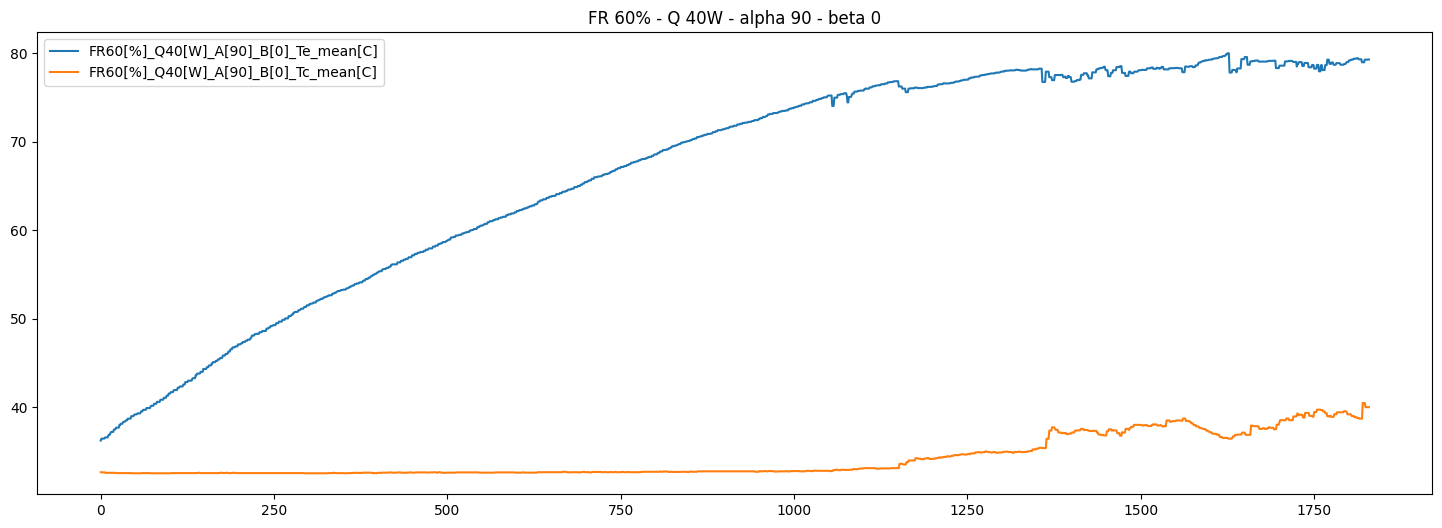

alpha 60, beta 0
alpha 30, beta 0


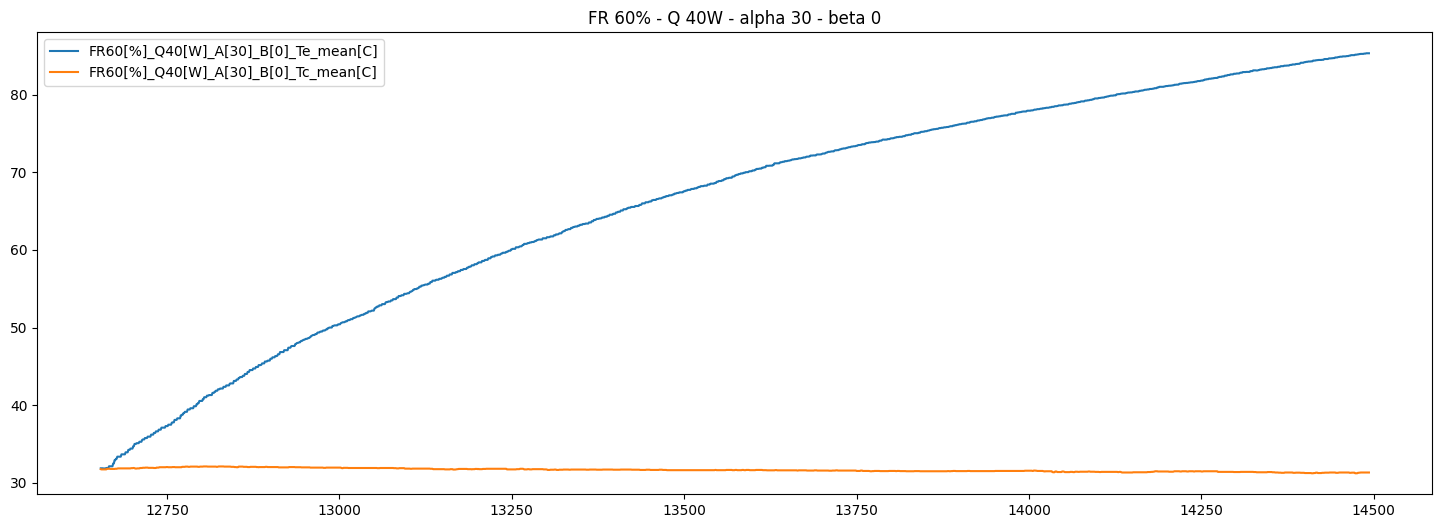

Q 60
alpha 90, beta 0


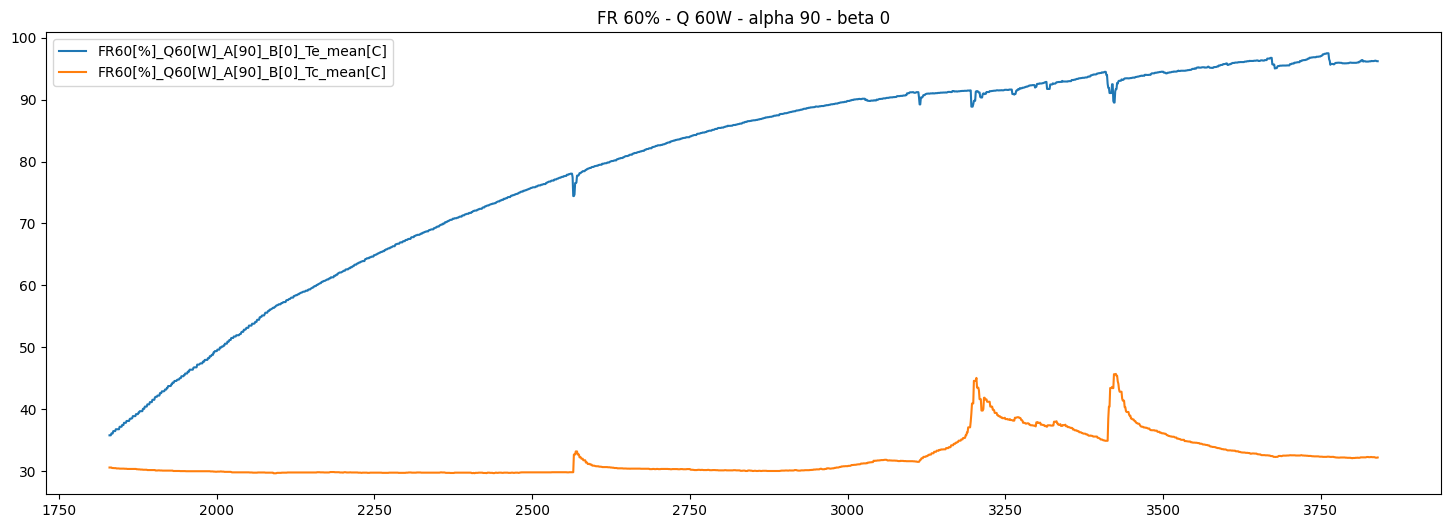

alpha 60, beta 0
alpha 30, beta 0


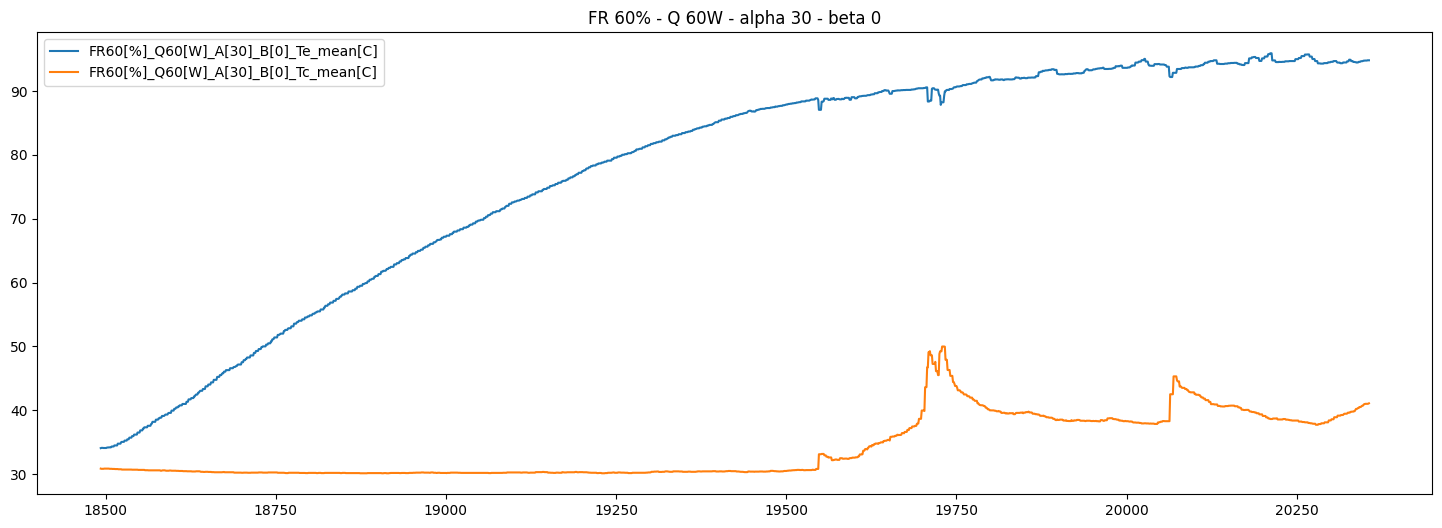

Q 80
alpha 90, beta 0


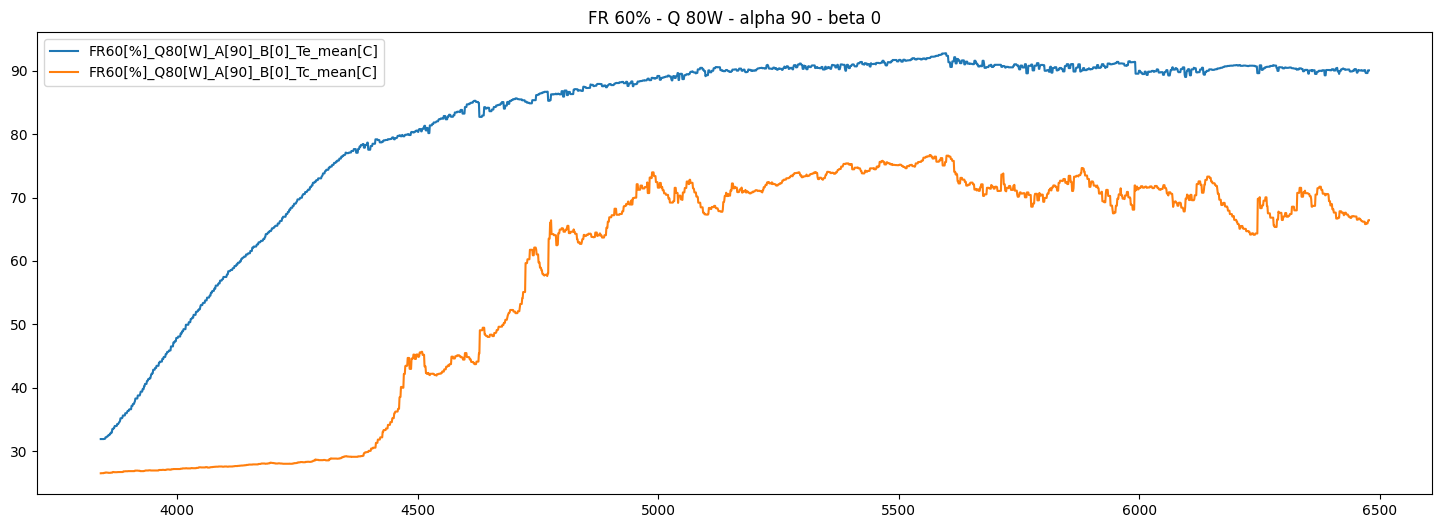

alpha 60, beta 0
alpha 30, beta 0


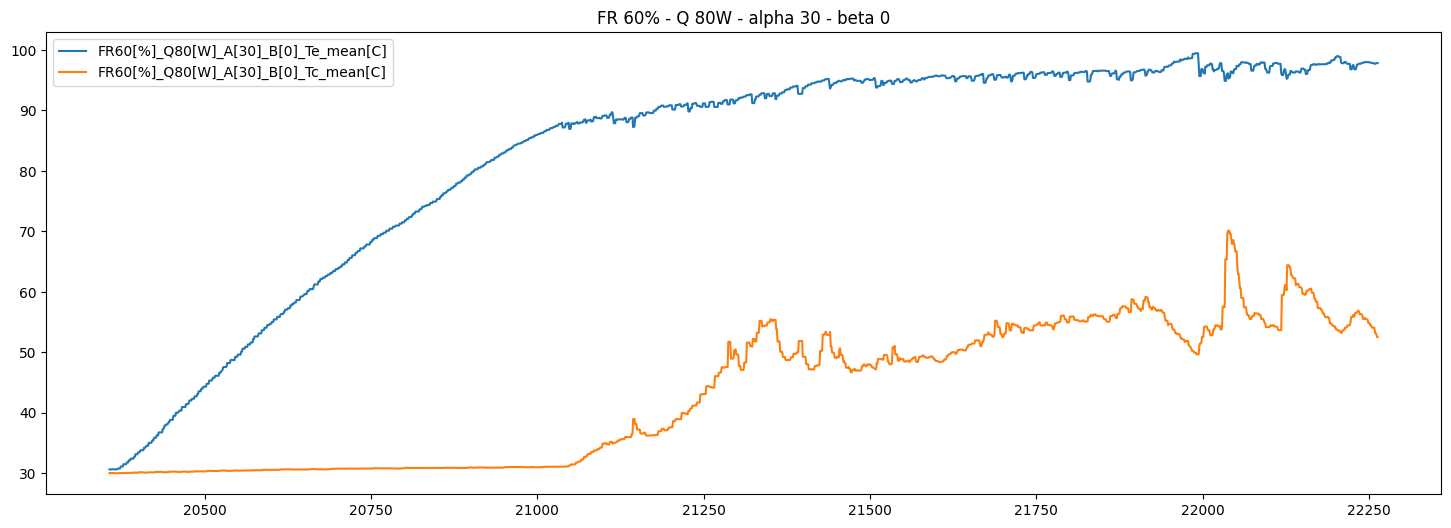

Q 100
alpha 90, beta 0


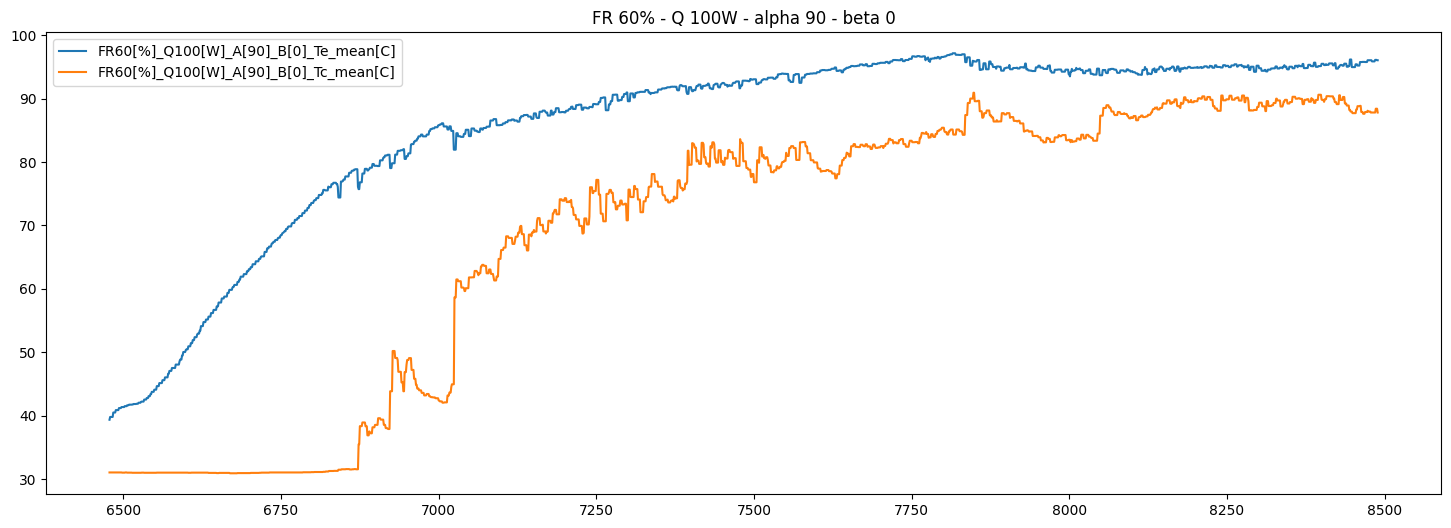

alpha 60, beta 0
alpha 30, beta 0


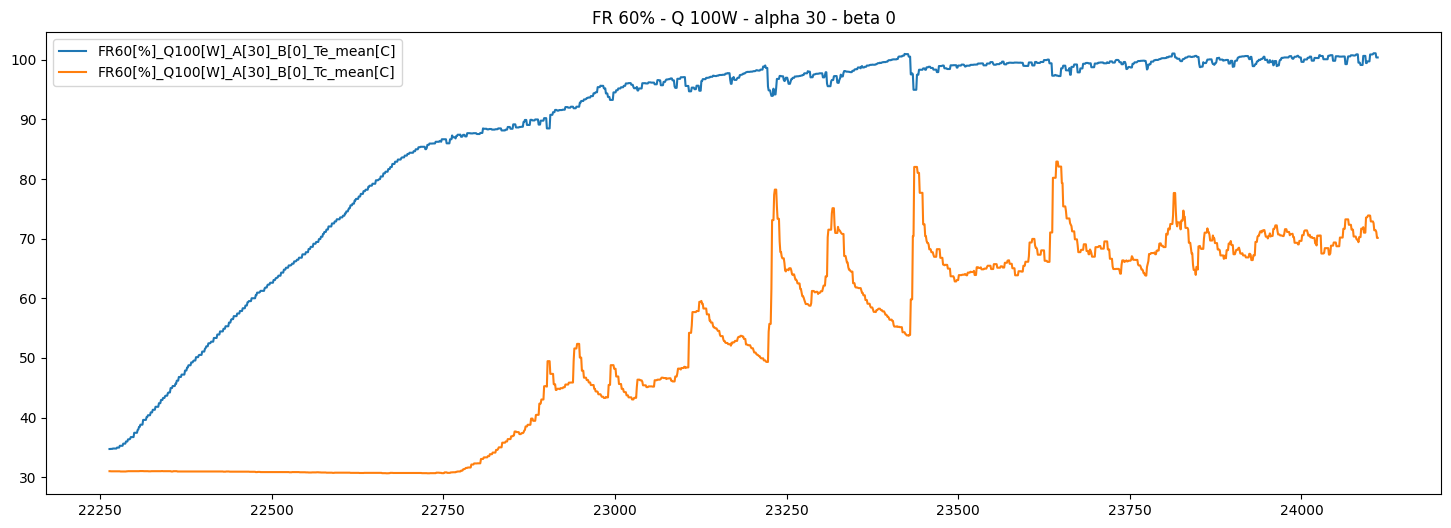

Q 120
alpha 90, beta 0


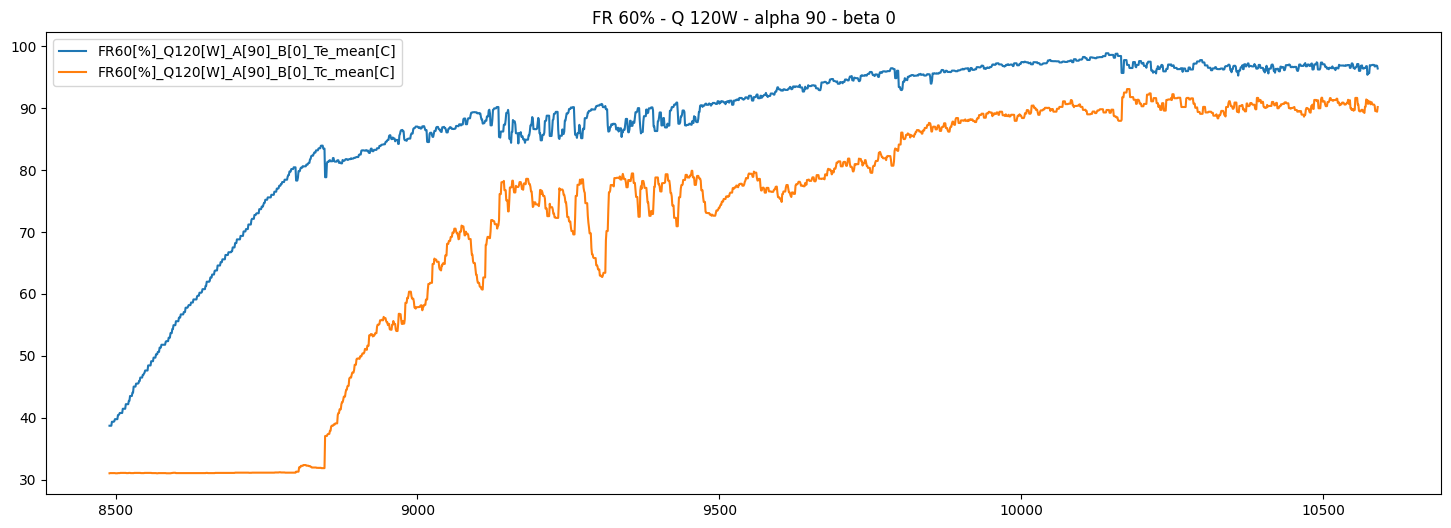

alpha 60, beta 0


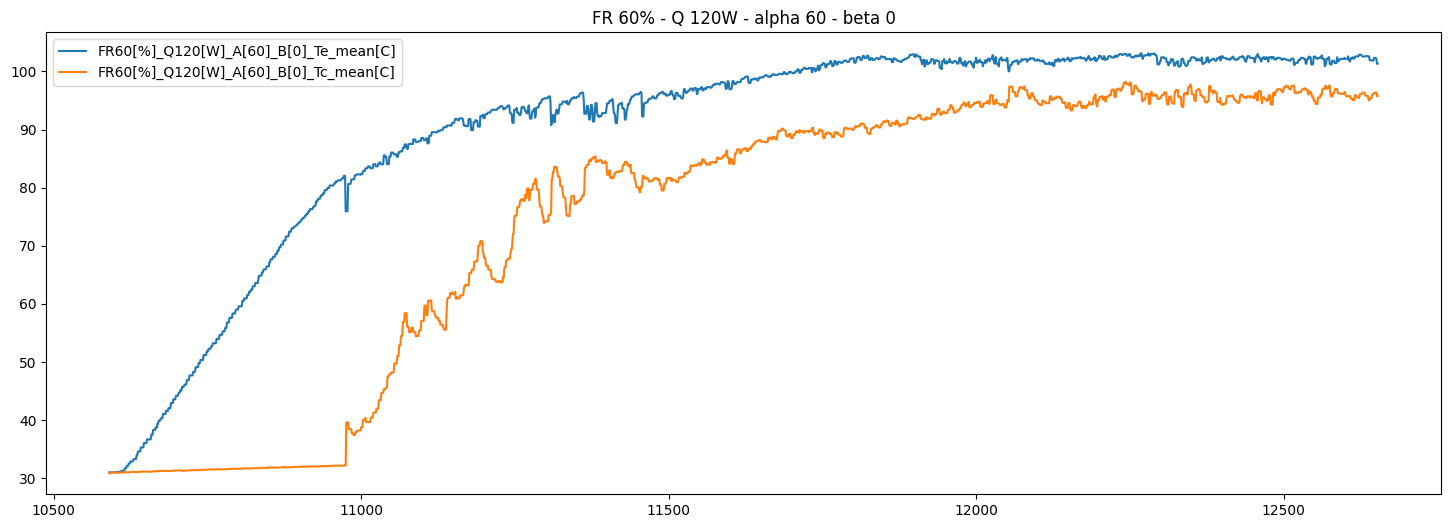

alpha 30, beta 0


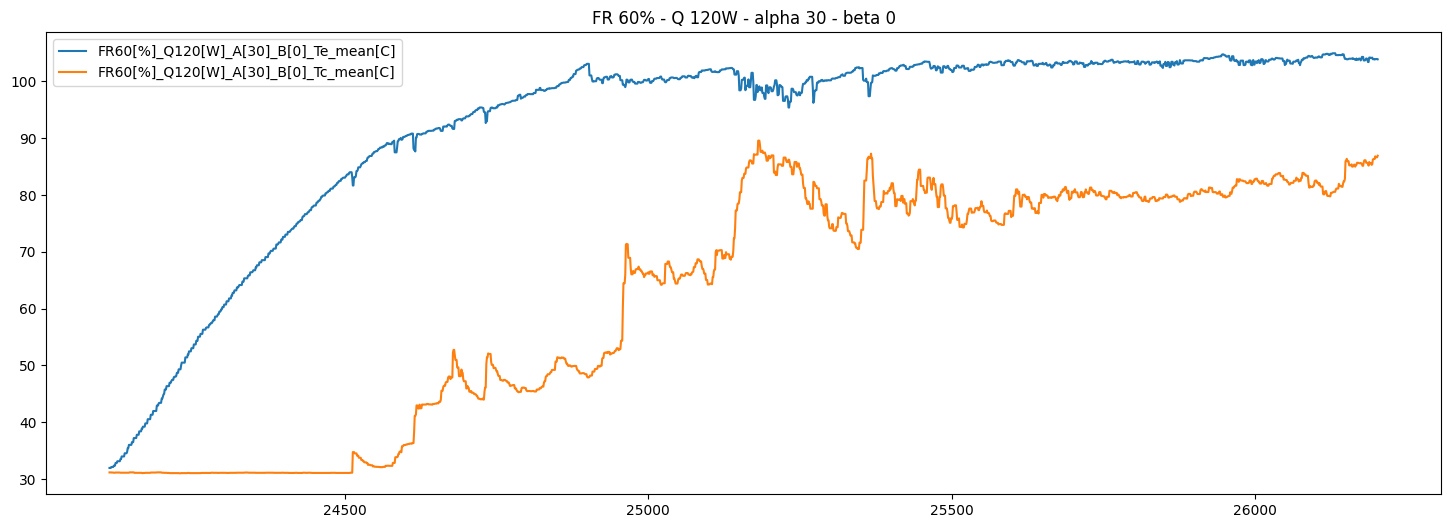

FR 40
Q 40
alpha 90, beta 0


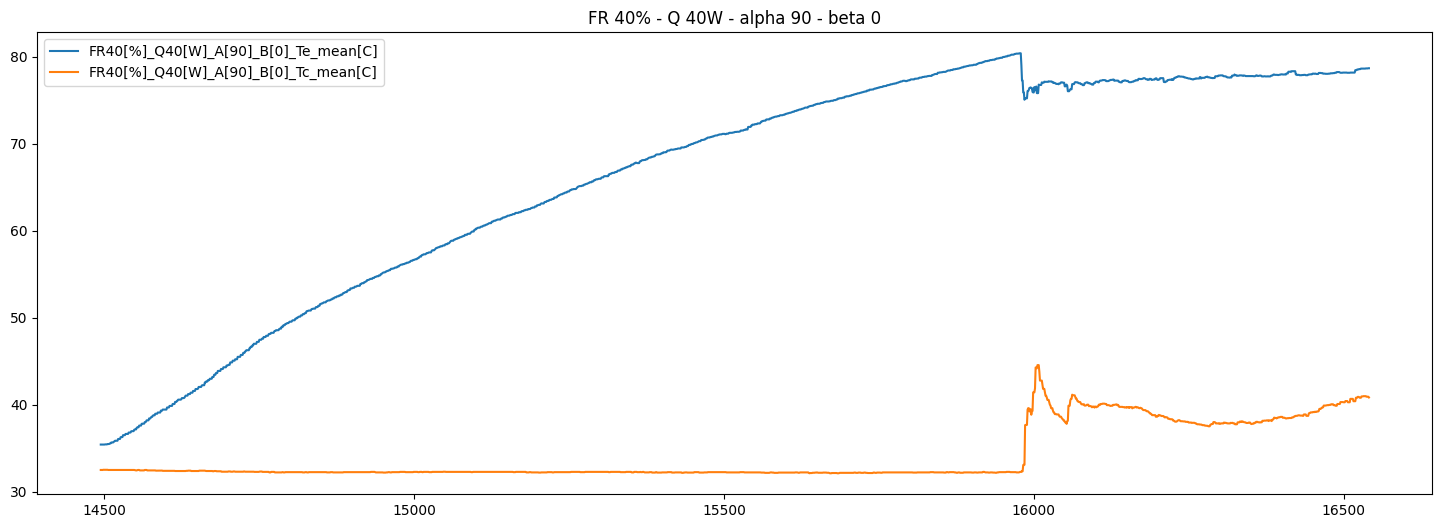

alpha 60, beta 0
alpha 30, beta 0
Q 60
alpha 90, beta 0


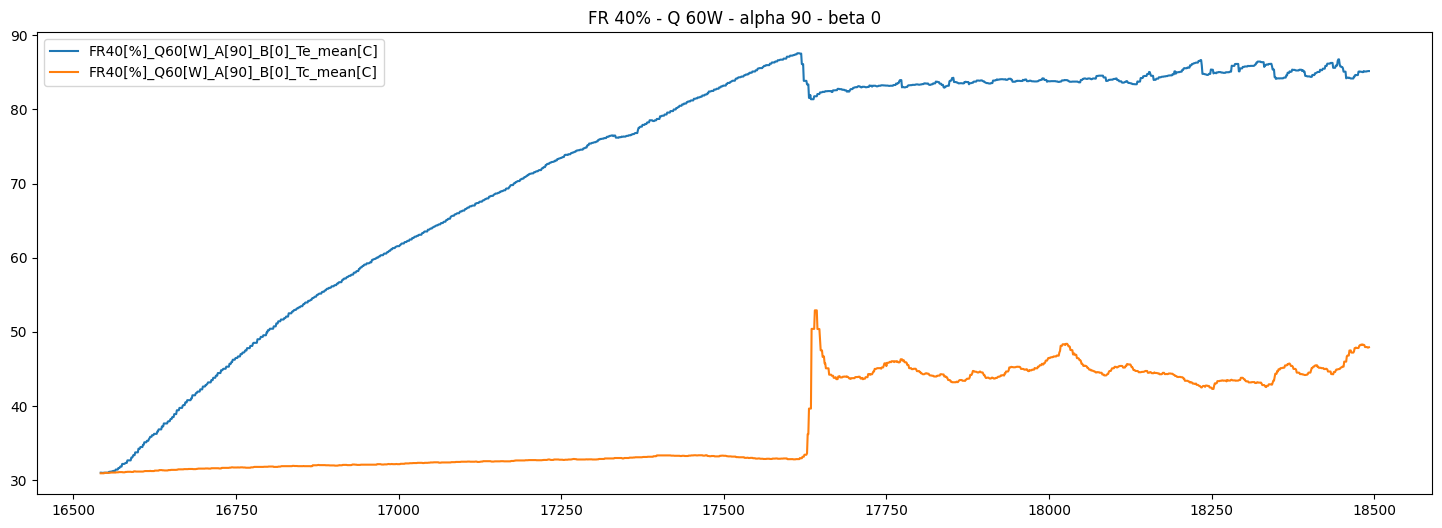

alpha 60, beta 0
alpha 30, beta 0
Q 80
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 100
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 120
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0


In [12]:
import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                
                if not df_.empty:
                    # Plotting
                    plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
                    plt.legend()
                    plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
                    plt.show()


In [13]:
import pygwalker as pyg
from pygwalker.api.streamlit import StreamlitRenderer
import streamlit as st
from streamlit.components.v1 import components

In [14]:
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S')

In [15]:
st.set_page_config(page_title='Pulsating Heat Pipe - Data Visualization Dash-Board',)
st.title('PHP')

pyg_html = pyg.walk(dataset=df, return_html=True)


2024-07-27 18:55:55.484 
  command:

    streamlit run d:\Phd\php_pulsating_heat_pipe\Krp_Analysis\Advanced_PulseHeatPipe_krp\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Box(children=(HTML(value='\n<div id="ifr-pyg-00061e3a9155a6fauManKoBZUARec58J" style="height: auto">\n    <hea…

FR 60
Q 40
alpha 90, beta 0


<Figure size 1800x900 with 0 Axes>

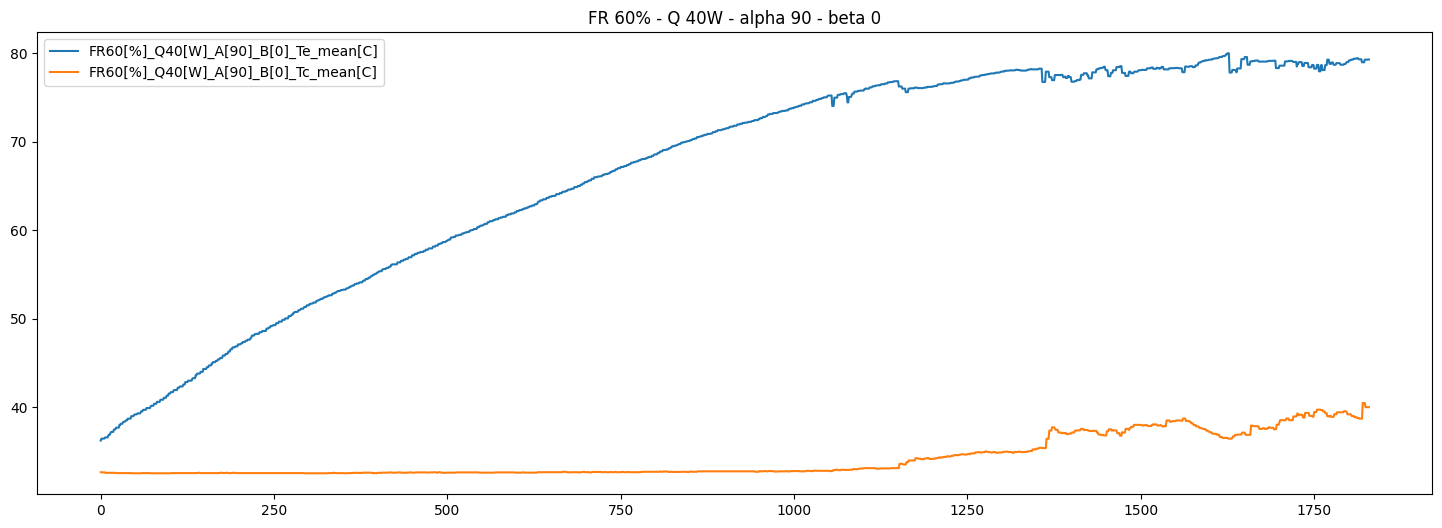

alpha 60, beta 0
alpha 30, beta 0


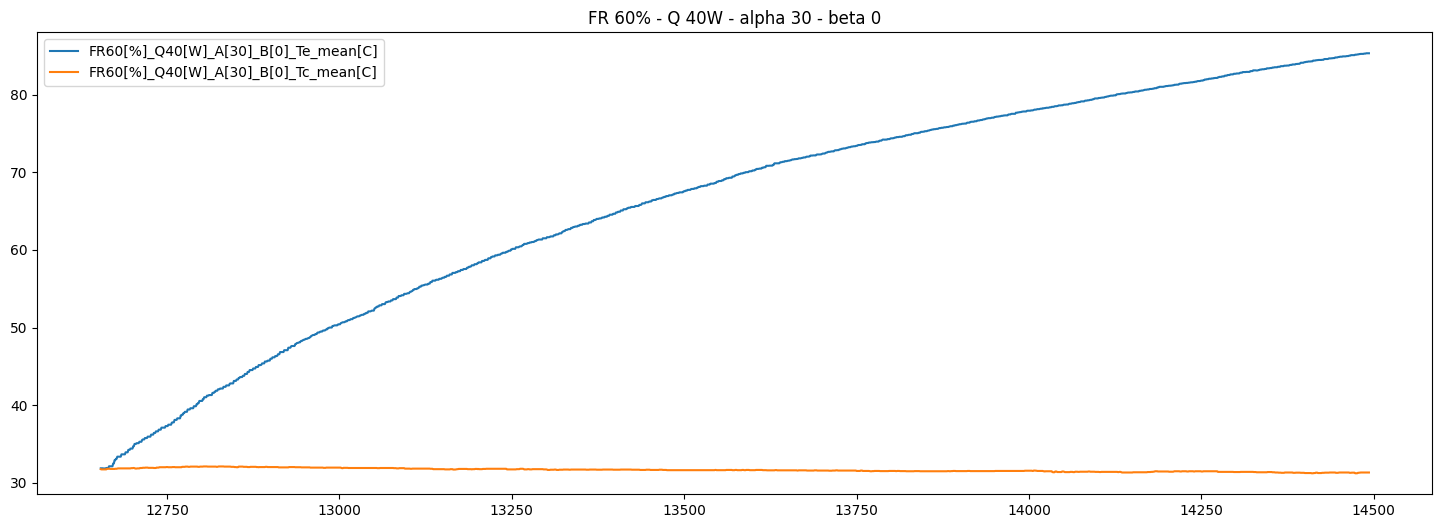

Q 60
alpha 90, beta 0


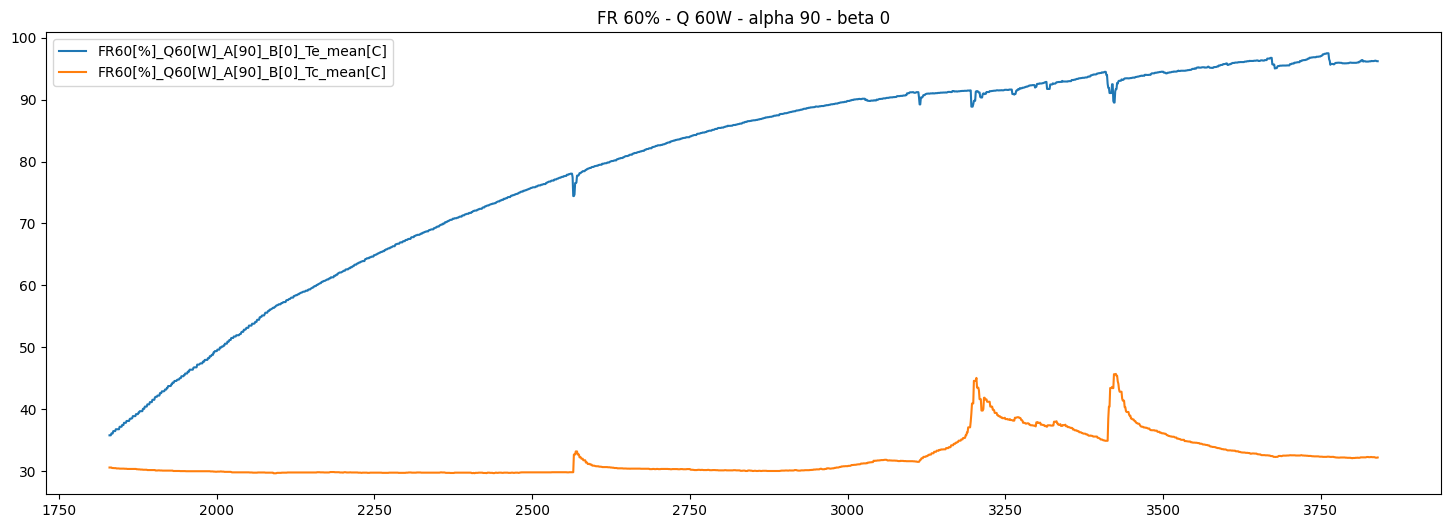

alpha 60, beta 0
alpha 30, beta 0


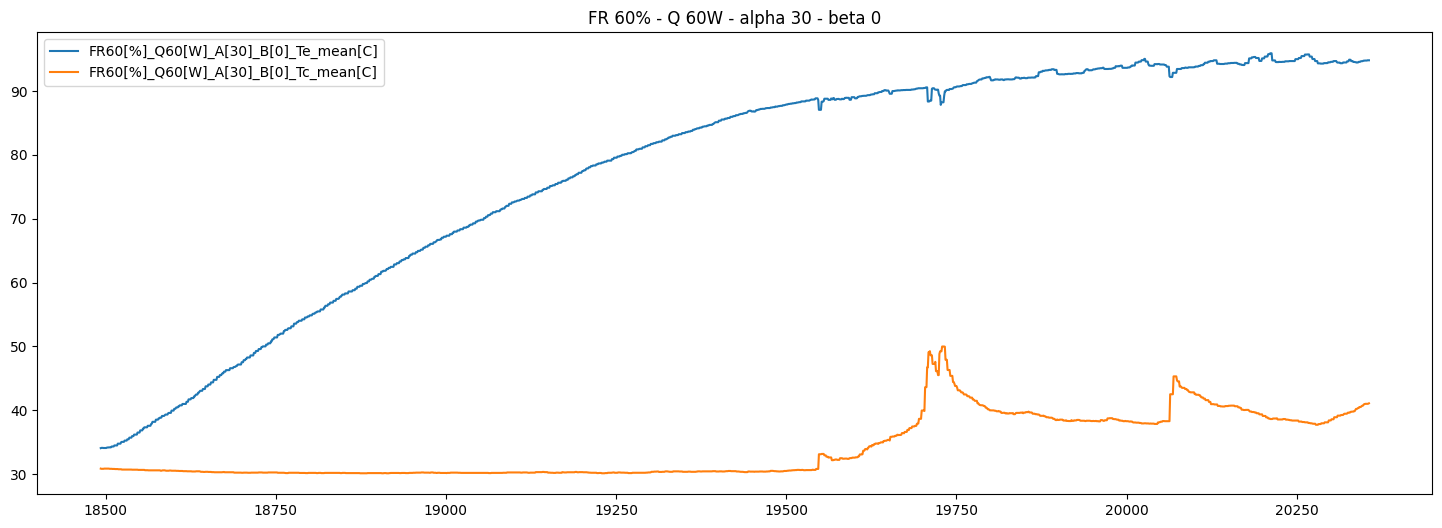

Q 80
alpha 90, beta 0


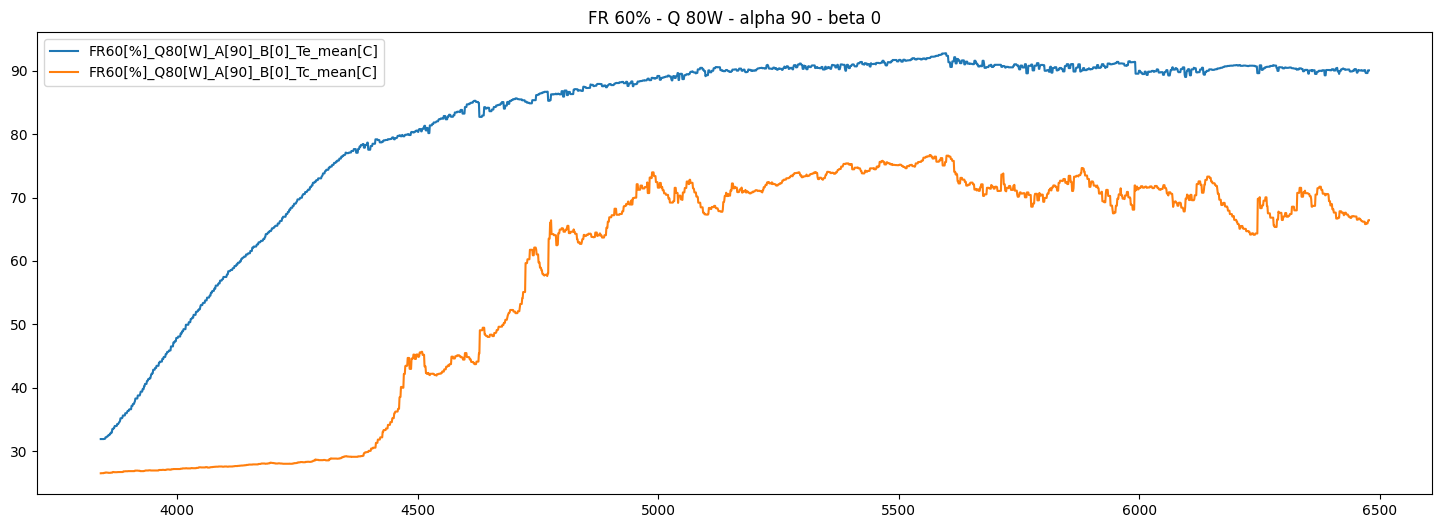

alpha 60, beta 0
alpha 30, beta 0


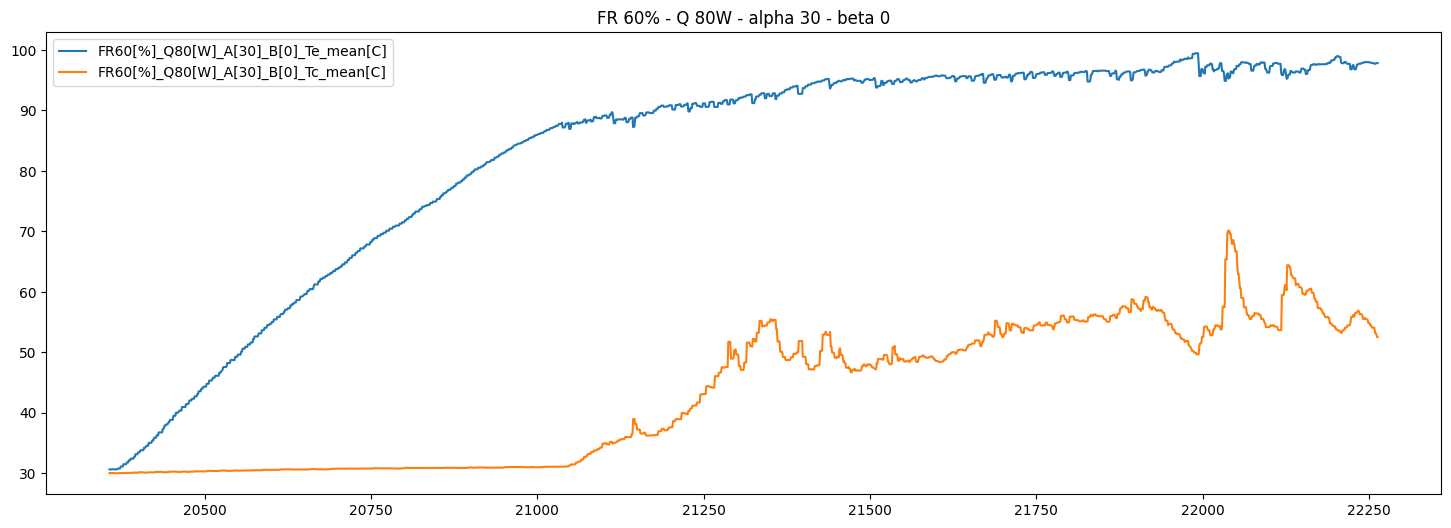

Q 100
alpha 90, beta 0


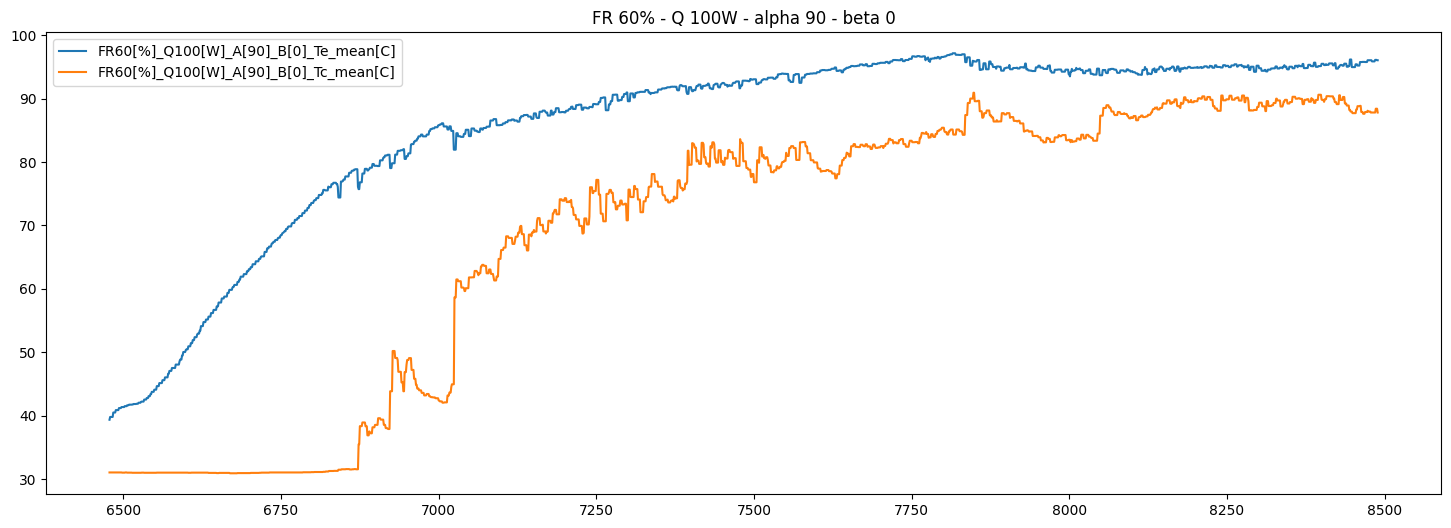

alpha 60, beta 0
alpha 30, beta 0


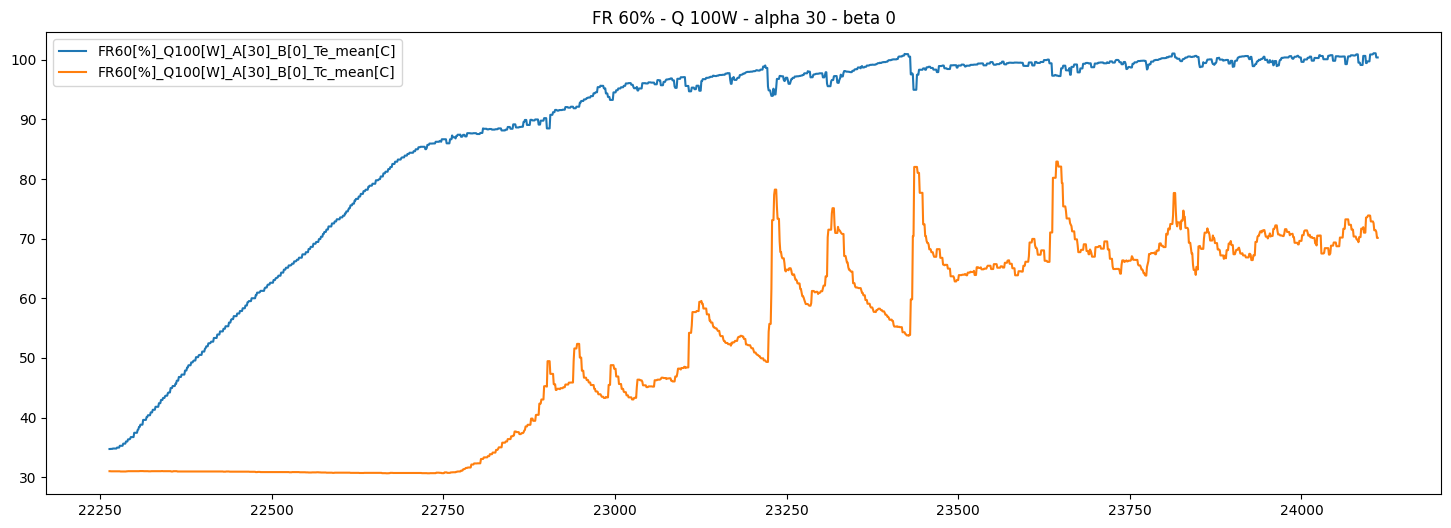

Q 120
alpha 90, beta 0


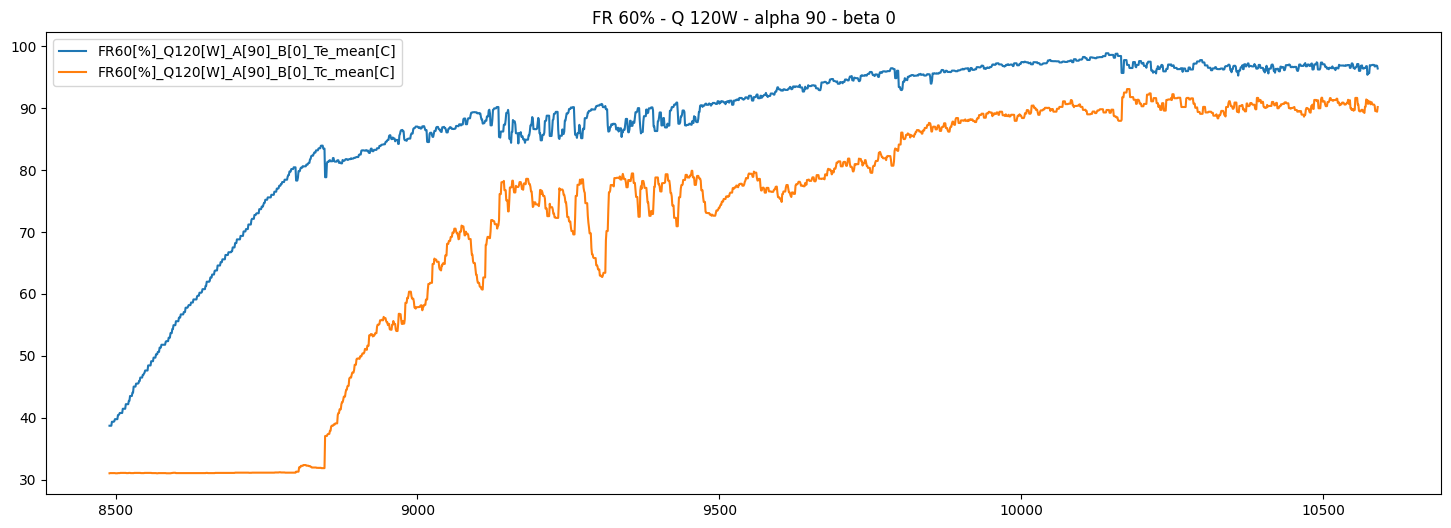

alpha 60, beta 0


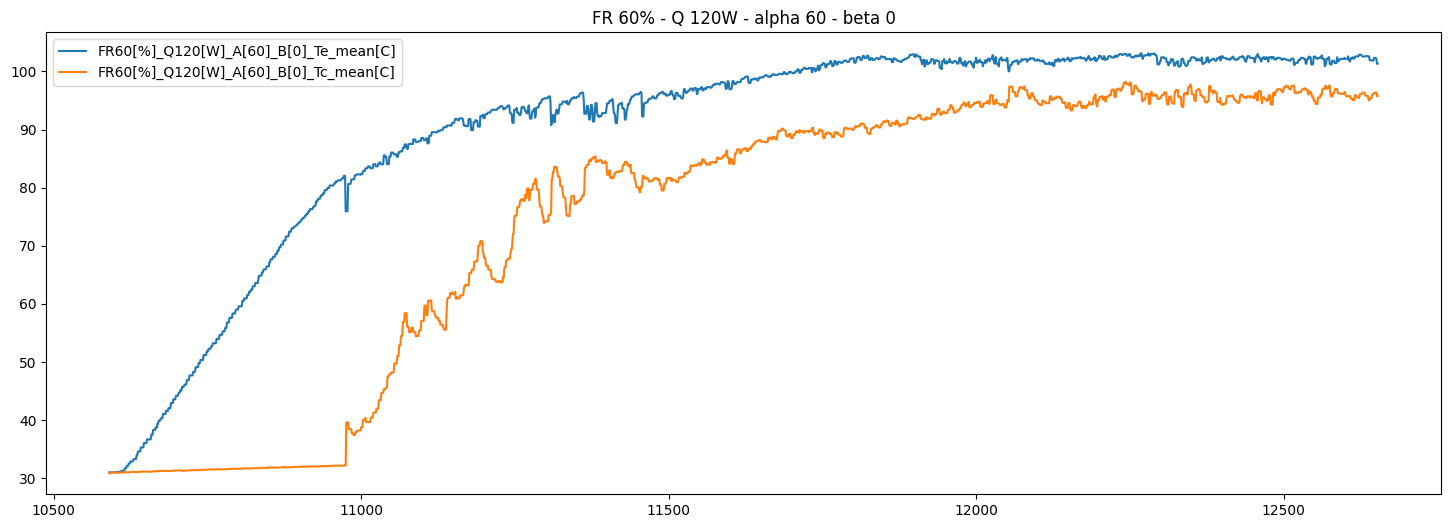

alpha 30, beta 0


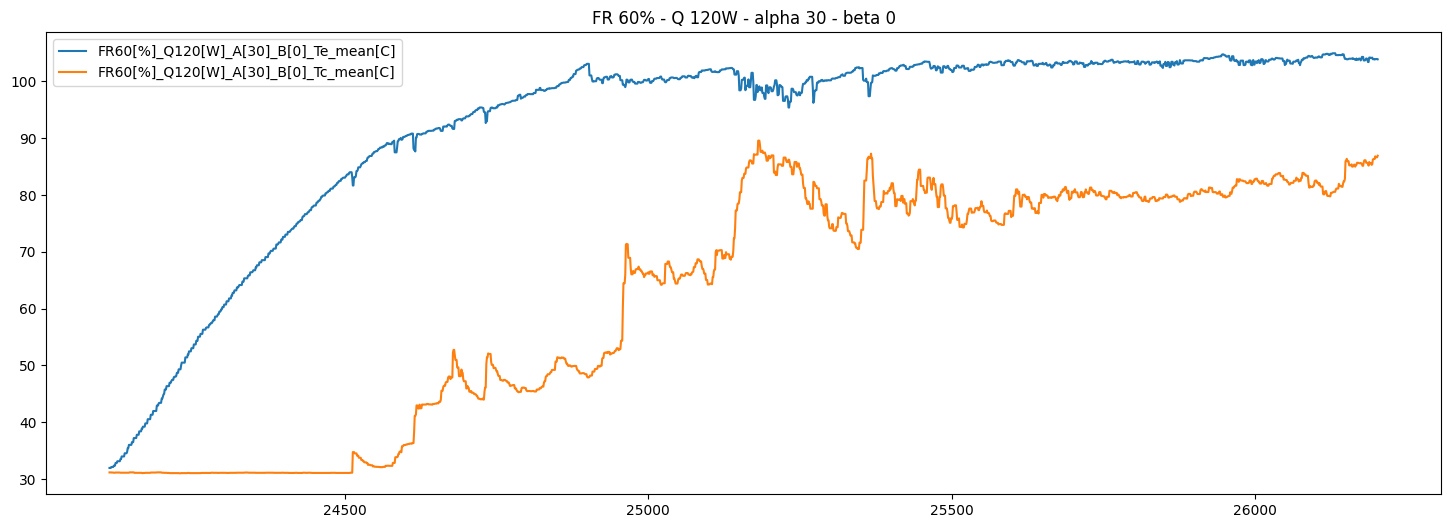

FR 40
Q 40
alpha 90, beta 0


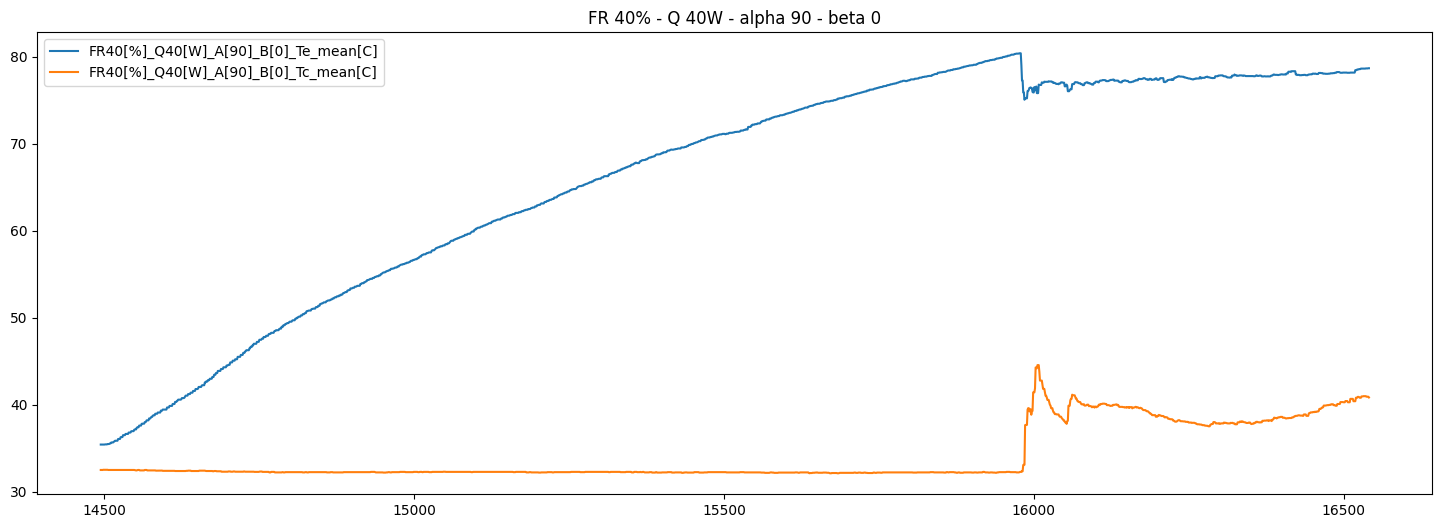

alpha 60, beta 0
alpha 30, beta 0
Q 60
alpha 90, beta 0


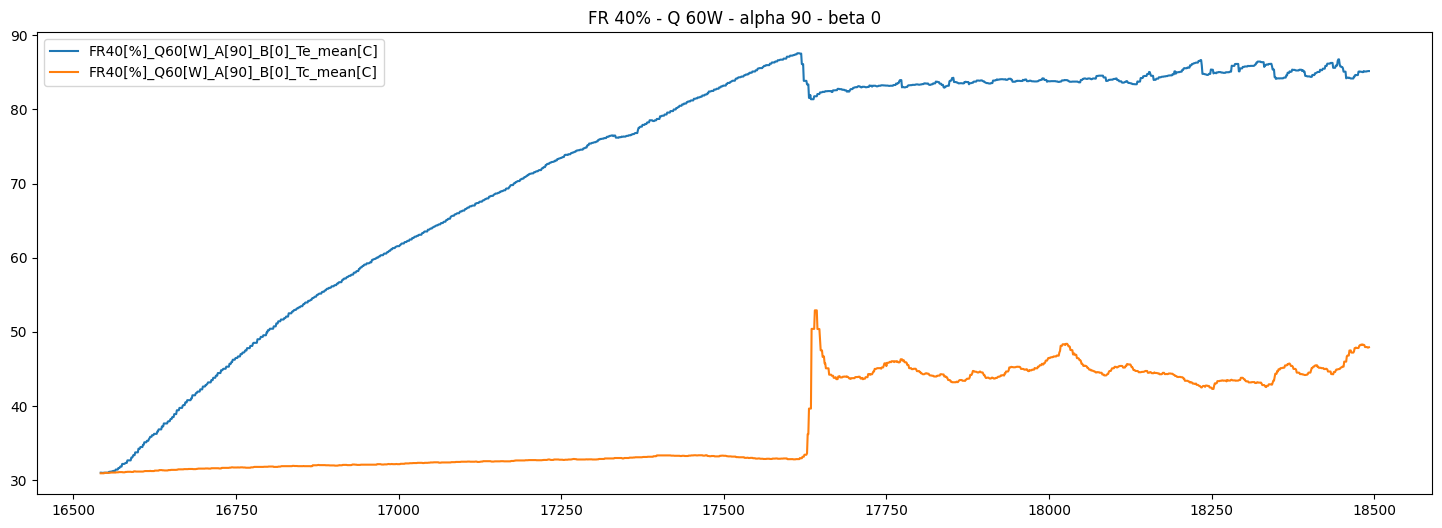

alpha 60, beta 0
alpha 30, beta 0
Q 80
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 100
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0
Q 120
alpha 90, beta 0
alpha 60, beta 0
alpha 30, beta 0


In [16]:
import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                
                if not df_.empty:
                    # Plotting
                    plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
                    plt.legend()
                    plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
                    plt.show()


In [17]:
pulse_time = db['pulse'].unique()

In [18]:
for time in pulse_time:
    db_pt = db[db['TIME']==time]
    Te_pt = db_pt['Te_mean[K]'].min()
    Tc_pt = db_pt['Tc_mean[K]'].min()
    print(Te_pt, Tc_pt)

340.31 305.77
313.73 300.08
309.65 302.95
371.29 362.6
nan nan
339.59 304.92
nan nan
330.01 303.32
347.37 304.05
nan nan
347.23 304.22


In [19]:
db['pulse'] = pd.to_datetime(db['pulse'])
db['TIME'] = pd.to_datetime(db['TIME'])

C:\Users\MSI (WIN10)\AppData\Local\Temp\ipykernel_27112\3001641875.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db['pulse'] = pd.to_datetime(db['pulse'])
C:\Users\MSI (WIN10)\AppData\Local\Temp\ipykernel_27112\3001641875.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db['TIME'] = pd.to_datetime(db['TIME'])


In [20]:
db

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,2024-07-27 11:32:06,04/04/2024,36.3,36.7,36.1,36.0,35.9,33.5,33.2,33.3,...,0.42,309.35,305.77,273.47,274.57,340.31,0.09,-2246.07,-2220.11,-25.96
1,2024-07-27 11:32:08,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.3,...,0.42,309.57,305.77,273.48,274.57,340.31,0.09,-2247.67,-2220.11,-27.55
2,2024-07-27 11:32:09,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
3,2024-07-27 11:32:10,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
4,2024-07-27 11:32:12,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,0.42,309.57,305.75,273.48,274.56,340.31,0.10,-2247.67,-2219.93,-27.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26198,2024-07-27 11:44:54,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.6,...,2.57,377.09,359.98,274.24,293.05,347.23,0.14,2922.43,2789.79,132.64
26199,2024-07-27 11:44:57,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.1,...,2.56,377.09,359.80,274.24,293.19,347.23,0.14,2910.22,2776.78,133.44
26200,2024-07-27 11:44:58,16/04/2024,102.8,103.3,103.4,105.2,105.0,81.7,96.3,61.1,...,2.56,377.09,359.80,274.24,293.19,347.23,0.14,2910.22,2776.78,133.44
26201,2024-07-27 11:44:59,16/04/2024,103.3,103.1,103.4,105.0,105.0,81.7,96.3,61.1,...,2.56,377.11,359.80,274.11,293.19,347.23,0.14,2910.37,2776.78,133.59
